<a href="https://colab.research.google.com/github/harshbmehta/PythonNotebooks/blob/main/google_cc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/binary_classification_rice.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=binary_classification#scrollTo=cJt1sNSzb-6z

In [ ]:
# @title Install required libraries

!pip install google-ml-edu==0.1.2 \
    keras~=3.8.0 \
    matplotlib~=3.10.0 \
    numpy~=2.0.0 \
    pandas~=2.2.0 \
    tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:


load imports

In [2]:
import keras
import pandas as pd
import numpy as np
import plotly.express as ex
import ml_edu.results
import ml_edu.experiment

pd.options.display.max_rows = 10;
pd.options.display.float_format = '{:.2f}'.format

In [3]:
sample_data = {
    'A': [1.2345, 2.3456, 3.4567],
    'B': [10.9876, 11.8765, 12.7654],
    'C': [0.123, 0.456, 0.789]
}
df = pd.DataFrame(sample_data)
print(df)

     A     B    C
0 1.23 10.99 0.12
1 2.35 11.88 0.46
2 3.46 12.77 0.79


In [4]:
rice_dataset_raw = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

In [5]:
rice_dataset_raw.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00
mean,12667.73,454.24,188.78,86.31,0.89,12952.50,0.66
std,1732.37,35.60,17.45,5.73,0.02,1776.97,0.08
min,7551.00,359.10,145.26,59.53,0.78,7723.00,0.50
25%,11370.50,426.14,174.35,82.73,0.87,11626.25,0.60
50%,12421.50,448.85,185.81,86.43,0.89,12706.50,0.65
75%,13950.00,483.68,203.55,90.14,0.90,14284.00,0.73
max,18913.00,548.45,239.01,107.54,0.95,19099.00,0.86


In [6]:
rice_dataset = rice_dataset_raw[[
    'Area',
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Eccentricity',
    'Convex_Area',
    'Extent',
    'Class',
]]
rice_dataset.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.58,229.75,85.09,0.93,15617,0.57,Cammeo
1,14656,494.31,206.02,91.73,0.90,15072,0.62,Cammeo
2,14634,501.12,214.11,87.77,0.91,14954,0.69,Cammeo
3,13176,458.34,193.34,87.45,0.89,13368,0.64,Cammeo
4,14688,507.17,211.74,89.31,0.91,15262,0.65,Cammeo


In [7]:
rice_dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00
mean,12667.73,454.24,188.78,86.31,0.89,12952.50,0.66
std,1732.37,35.60,17.45,5.73,0.02,1776.97,0.08
min,7551.00,359.10,145.26,59.53,0.78,7723.00,0.50
25%,11370.50,426.14,174.35,82.73,0.87,11626.25,0.60
50%,12421.50,448.85,185.81,86.43,0.89,12706.50,0.65
75%,13950.00,483.68,203.55,90.14,0.90,14284.00,0.73
max,18913.00,548.45,239.01,107.54,0.95,19099.00,0.86


describing the data

In [8]:
rice_dataset.Perimeter.max()

548.445983886719

In [9]:
rice_dataset.Area.std()


1732.367706074159

In [10]:
std_perimeter = rice_dataset.Perimeter.std()
print(f"Standard deviation of Perimeter: {std_perimeter:.2f}")

Standard deviation of Perimeter: 35.60


Visualizing the fields


In [11]:
for x_axis,y_axis in [
    ('Area', 'Perimeter'),
 ('Area', 'Major_Axis_Length'),
 ('Area', 'Minor_Axis_Length'),
 ('Area', 'Eccentricity')
    ]:
    ex.scatter(rice_dataset, x=x_axis, y=y_axis,color="Class").show()

In [12]:
#@title Plot three features in 3D by entering their names and running this cell

x_axis_data = 'Perimeter'  # @param {type: "string"}
y_axis_data = 'Area'  # @param {type: "string"}
z_axis_data = 'Eccentricity'  # @param {type: "string"}

ex.scatter_3d(
    rice_dataset,
    x=x_axis_data,
    y=y_axis_data,
    z=z_axis_data,
    color='Class',
).show()

In [15]:
# @title One possible solution

# Plot major and minor axis length and eccentricity, with observations
# color-coded by class.
ex.scatter_3d(
    rice_dataset,
    x='Eccentricity',
    y='Area',
    z='Major_Axis_Length',
    color='Class',
).show()

In [16]:
feature_mean = rice_dataset.mean(numeric_only=True)
feature_std = rice_dataset.std(numeric_only=True)
numeric_features = rice_dataset.select_dtypes(include=np.number).columns
normalized_features = rice_dataset[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

normalized_features['Class'] = rice_dataset['Class']

normalized_features.head(n=150)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.48,2.00,2.35,-0.21,2.02,1.50,-1.15,Cammeo
1,1.15,1.13,0.99,0.95,0.41,1.19,-0.60,Cammeo
2,1.14,1.32,1.45,0.25,1.21,1.13,0.41,Cammeo
3,0.29,0.12,0.26,0.20,0.24,0.23,-0.28,Cammeo
4,1.17,1.49,1.32,0.52,0.95,1.30,-0.21,Cammeo
...,...,...,...,...,...,...,...,...
145,2.41,1.92,1.58,2.46,-0.06,2.51,0.95,Cammeo
146,0.57,0.49,0.25,0.92,-0.30,0.62,0.63,Cammeo
147,0.93,1.08,1.15,0.32,0.95,0.99,-1.03,Cammeo
148,-0.27,0.00,0.18,-0.73,0.81,-0.22,1.15,Cammeo


In [29]:
keras.utils.set_random_seed(42)

In [17]:
normalized_features['Class_Bool'] = (normalized_features['Class'] == 'Cammeo').astype(int)
normalized_features.sample(100)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
2669,0.30,0.24,0.09,0.52,-0.18,0.30,0.34,Osmancik,0
2414,-0.81,-1.11,-1.28,0.25,-1.79,-0.84,-0.56,Osmancik,0
1484,0.94,1.69,2.16,-0.82,2.21,1.00,-1.95,Cammeo,1
2062,-1.39,-1.17,-1.27,-1.05,-0.51,-1.35,-1.12,Osmancik,0
2139,0.56,0.01,-0.35,1.64,-1.69,0.49,-0.45,Osmancik,0
...,...,...,...,...,...,...,...,...,...
819,0.09,0.52,0.78,-0.89,1.40,0.10,-0.10,Cammeo,1
1887,-0.66,-0.57,-0.25,-1.07,0.66,-0.71,-0.64,Osmancik,0
3137,0.14,0.22,-0.17,0.54,-0.49,0.14,0.85,Osmancik,0
3659,-1.47,-1.42,-1.25,-1.41,-0.17,-1.45,0.13,Osmancik,0


In [18]:
total_count = len(normalized_features)
ind_80 = round(total_count * 0.8)
ind_90 = ind_80 + round(total_count*0.1)

shuffled_data = normalized_features.sample(frac=1,random_state=100)
train_data = shuffled_data[0:ind_80]
validation_data = shuffled_data[ind_80:ind_90]
test_data = shuffled_data[ind_90:]

test_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
2405,-0.44,-0.66,-0.83,0.31,-1.15,-0.44,0.34,Osmancik,0
3062,-0.20,-0.01,0.22,-0.66,0.80,-0.21,1.61,Osmancik,0
1155,1.38,1.21,1.08,1.18,0.34,1.34,0.71,Cammeo,1
660,1.17,1.02,0.82,1.31,-0.00,1.19,-0.61,Cammeo,1
2451,-1.15,-1.19,-1.42,-0.28,-1.48,-1.11,0.05,Osmancik,0


In [20]:
label_col = ['Class', 'Class_Bool']

train_features = train_data.drop(columns=label_col)
train_labels = train_data['Class_Bool'].to_numpy()
validation_features = validation_data.drop(columns=label_col)
validation_labels = validation_data['Class_Bool'].to_numpy()
test_features = test_data.drop(columns=label_col)
test_labels = test_data['Class_Bool'].to_numpy()


In [21]:
# Name of the features we'll train our model on.
input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Area',
]

In [25]:
def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric]
) -> keras.Model:

  """Create and compile a simple classification model."""

  model_input = [
      keras.Input(shape=(1,), name=feature)
      for feature in settings.input_features
  ]

  concatenated_inputs = keras.layers.Concatenate()(model_input)

  model_output = keras.layers.Dense(1, activation=keras.activations.sigmoid)(concatenated_inputs)

  model = keras.Model(inputs=model_input, outputs=model_output)


  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Feed a dataset into the model in order to train it."""

  # The x parameter of keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in settings.input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=settings.batch_size,
      epochs=settings.number_epochs,
  )

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1389 - auc: 0.0506 - loss: 1.2592 - precision: 0.1731 - recall: 0.2677
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1461 - auc: 0.0560 - loss: 1.1992 - precision: 0.1774 - recall: 0.2749
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1515 - auc: 0.0587 - loss: 1.1483 - precision: 0.1832 - recall: 0.2912
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1648 - auc: 0.0596 - loss: 1.1090 - precision: 0.2035 - recall: 0.3246
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1850 - auc: 0.0722 - loss: 1.0588 - precision: 0.2261 - recall: 0.3499
Epoch 6/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2039 - auc: 0.0779 - loss: 1.0162 - precision: 0.2472 - recall: 0.4025
Epoch 7/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2240 - auc: 0.0876 - loss: 0.9699 - precision: 0.2674 - recall: 0.4512
Epoch 8/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

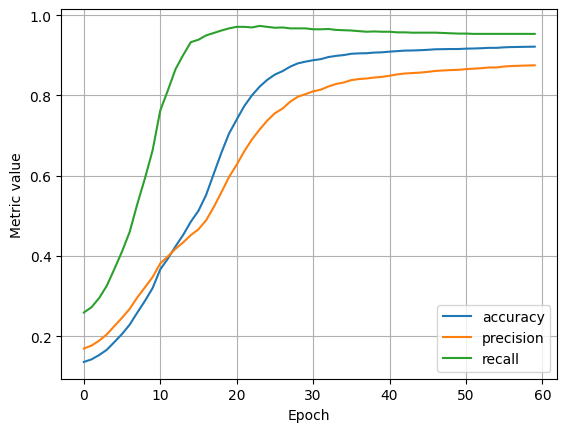

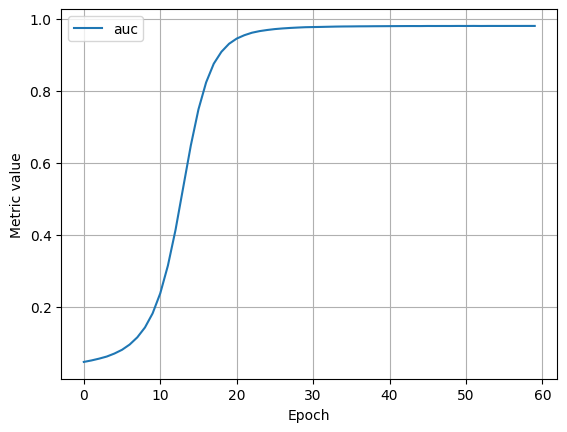

In [26]:
# Let's define our first experiment settings.
settings = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.35,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=settings.classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)

# Plot metrics vs. epochs
ml_edu.results.plot_experiment_metrics(experiment, ['accuracy', 'precision', 'recall'])
ml_edu.results.plot_experiment_metrics(experiment, ['auc'])

In [27]:
def compare_train_validation(experiment: ml_edu.experiment.Experiment, validation_metrics: dict[str, float]):
  print('Comparing metrics between train and validation:')
  for metric, validation_value in validation_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Validation {metric}:  {validation_value:.4f}')


# Evaluate validation metrics
validation_metrics = experiment.evaluate(validation_features, validation_labels)
compare_train_validation(experiment, validation_metrics)

Comparing metrics between train and validation:
------
Train accuracy: 0.9216
Validation accuracy:  0.8871
------
Train auc: 0.9794
Validation auc:  0.9713
------
Train loss: 0.1908
Validation loss:  0.2221
------
Train precision: 0.8752
Validation precision:  0.8316
------
Train recall: 0.9534
Validation recall:  0.9349


In [28]:
#@title Solution
# Features used to train the model on.
# Specify all features.
all_input_features = [
  'Eccentricity',
  'Major_Axis_Length',
  'Minor_Axis_Length',
  'Area',
  'Convex_Area',
  'Perimeter',
  'Extent',
]

Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - auc: 0.9549 - loss: 0.3743 - precision: 0.8292 - recall: 0.9056
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - auc: 0.9584 - loss: 0.3562 - precision: 0.8318 - recall: 0.9214
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9050 - auc: 0.9671 - loss: 0.3259 - precision: 0.8596 - recall: 0.9273
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9177 - auc: 0.9723 - loss: 0.3002 - precision: 0.8827 - recall: 0.9354
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9127 - auc: 0.9689 - loss: 0.2955 - precision: 0.8717 - recall: 0.9288
Epoch 6/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9170 - auc: 0.9692 - loss: 0.2806 - precision: 0.8845 - recall: 0.9242
Epoch 7/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - auc: 0.9694 - loss: 0.2742 - precision: 0.8887 - recall: 0.9094
Epoch 8/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

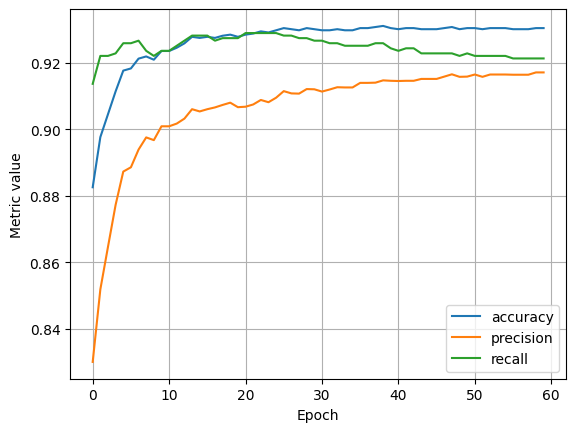

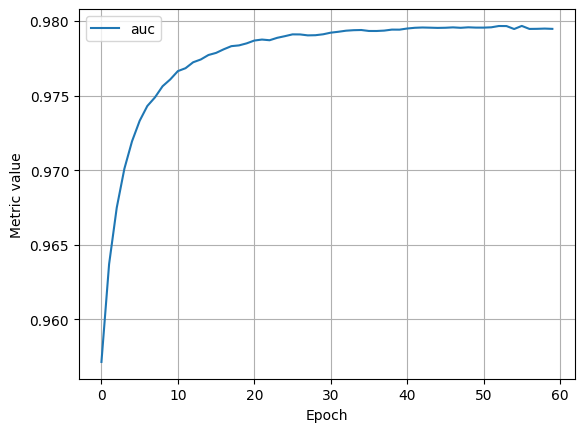

In [29]:
settings_all_features = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.5,
    input_features=all_input_features,
)

# Modify the following definition of METRICS to generate
# not only accuracy and precision, but also recall:
metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy',
        threshold=settings_all_features.classification_threshold,
    ),
    keras.metrics.Precision(
        name='precision',
        thresholds=settings_all_features.classification_threshold,
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings_all_features.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model_all_features = create_model(settings_all_features, metrics)

# Train the model on the training set.
experiment_all_features = train_model(
    'all features',
    model_all_features,
    train_features,
    train_labels,
    settings_all_features,
)

# Plot metrics vs. epochs
ml_edu.results.plot_experiment_metrics(
    experiment_all_features, ['accuracy', 'precision', 'recall']
)
ml_edu.results.plot_experiment_metrics(experiment_all_features, ['auc'])

In [30]:
validation_metrics_all_features = experiment_all_features.evaluate(
    validation_features,
    validation_labels,
)
compare_train_validation(experiment_all_features, validation_metrics_all_features)

Comparing metrics between train and validation:
------
Train accuracy: 0.9304
Validation accuracy:  0.9134
------
Train auc: 0.9795
Validation auc:  0.9716
------
Train loss: 0.1793
Validation loss:  0.2152
------
Train precision: 0.9171
Validation precision:  0.8953
------
Train recall: 0.9213
Validation recall:  0.9112


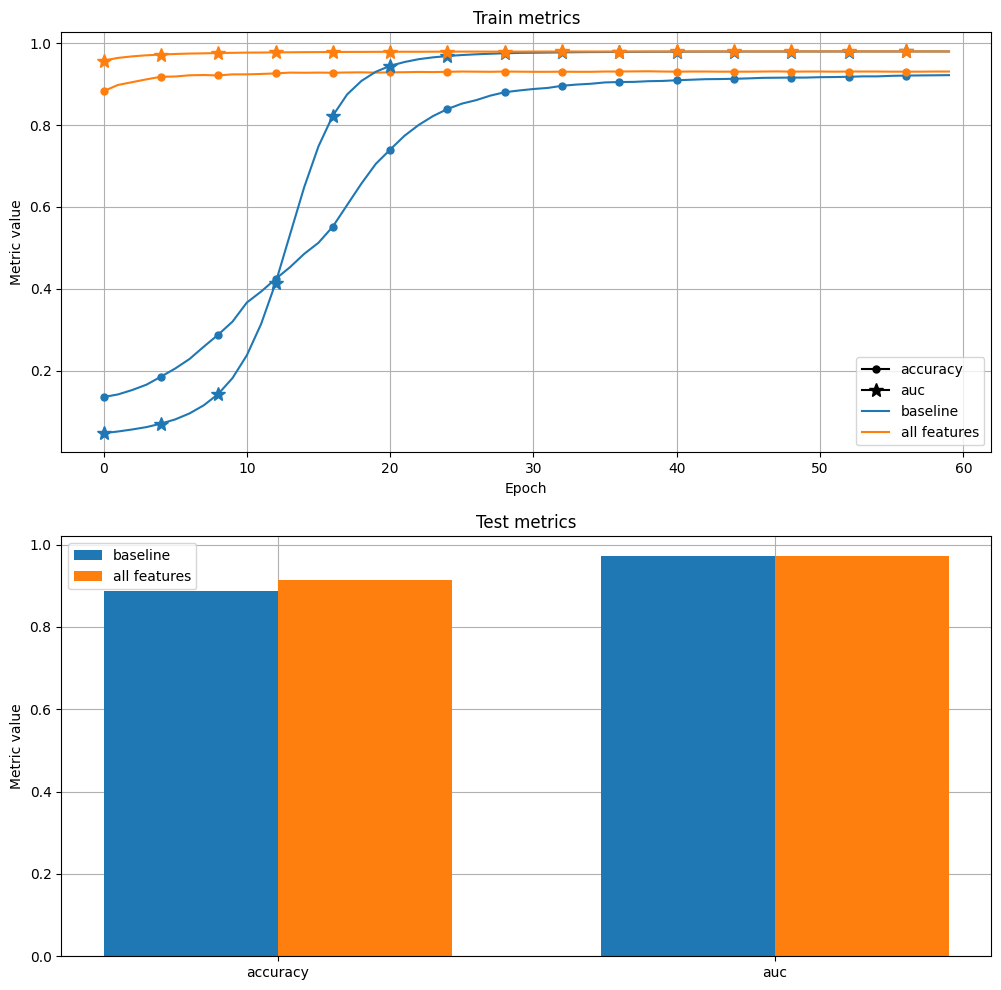

In [31]:
ml_edu.results.compare_experiment([experiment, experiment_all_features],
                                  ['accuracy', 'auc'],
                                  validation_features, validation_labels)

In [32]:
test_metrics_all_features = experiment_all_features.evaluate(
    test_features,
    test_labels,
)
for metric, test_value in test_metrics_all_features.items():
  print(f'Test {metric}:  {test_value:.4f}')

Test accuracy:  0.9239
Test auc:  0.9760
Test loss:  0.1899
Test precision:  0.9073
Test recall:  0.9013
